In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\netflix.csv')

In [30]:
#checking the columns 
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [31]:
df.tail()

,title,genre,language,imdb_score,premiere,runtime,year
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014
582,Biggie: I Got a Story to Tell,Documentary,English,6.9,3/1/2021,97,2021


In [32]:
#column names 
df.columns.values

array(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'], dtype=object)

In [33]:
#checking null values
df.isna().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [34]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


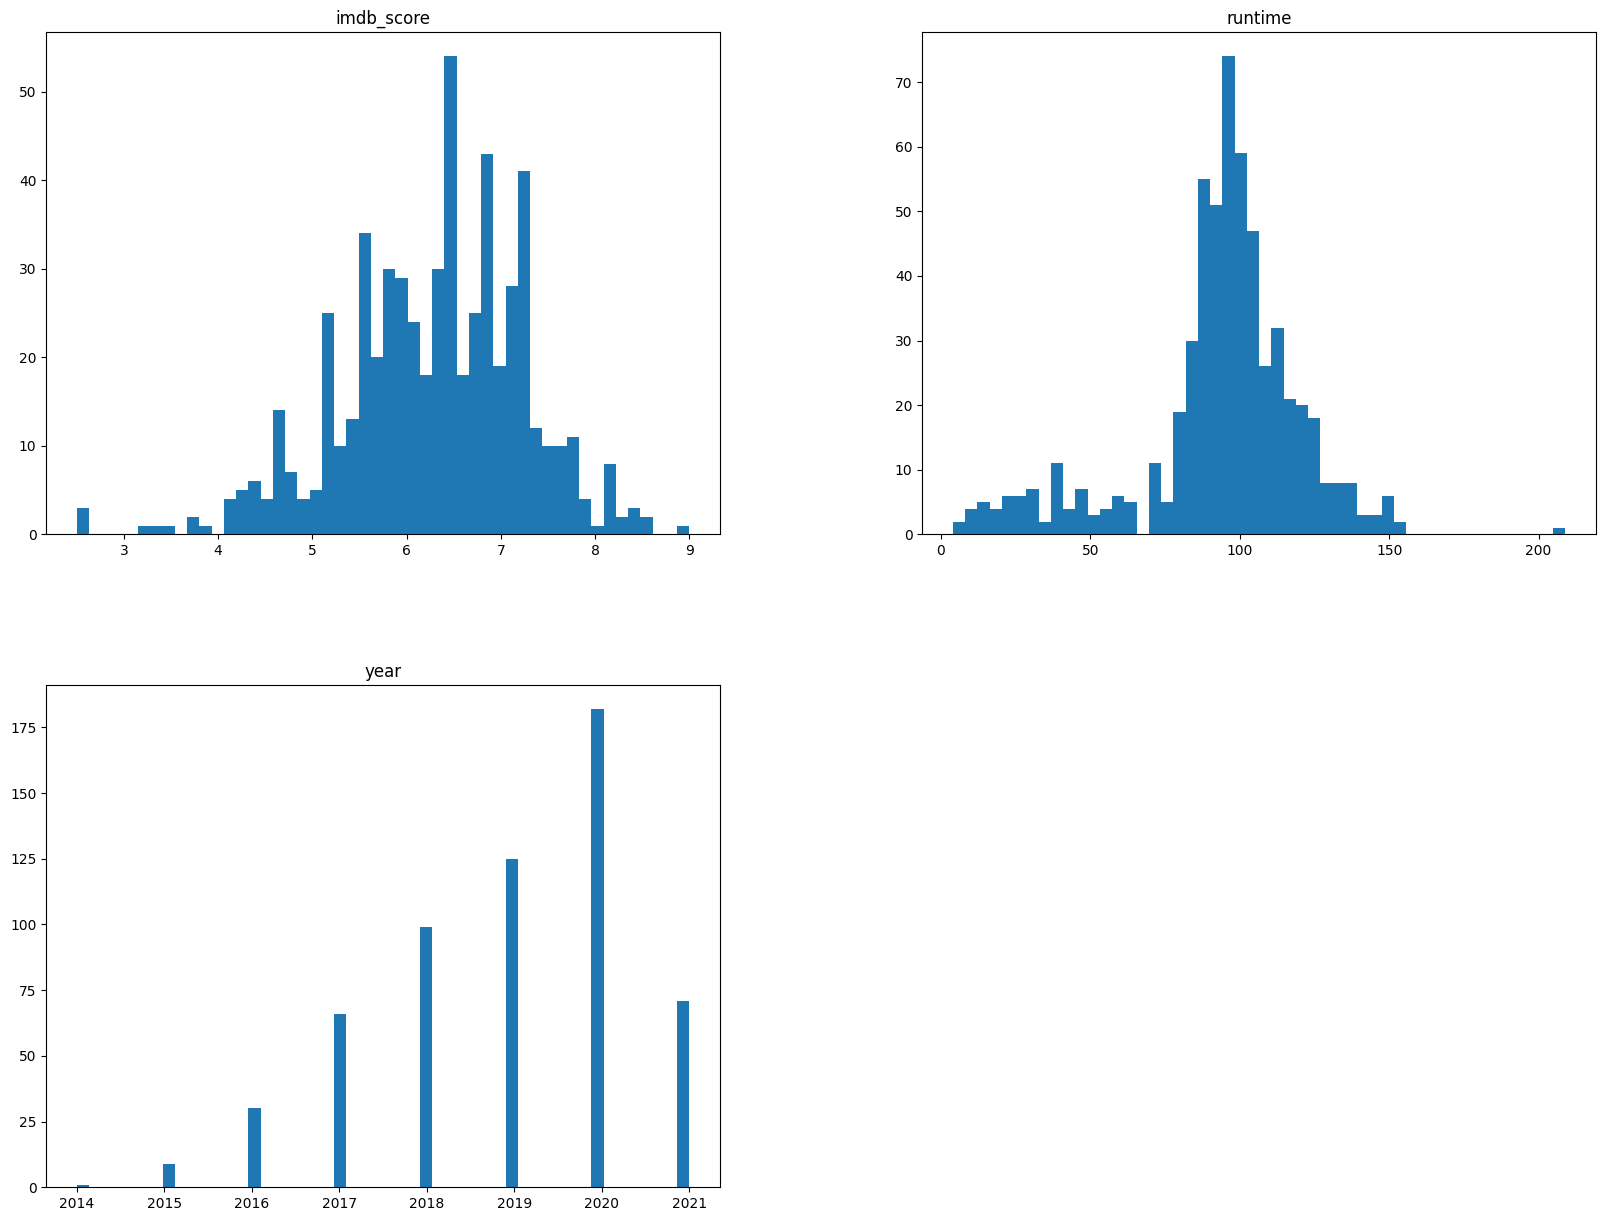

In [35]:
df.hist(bins=50,grid= False,figsize=(20,15));

In [36]:
#states describe summary
df.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


In [56]:
questions = ["1. How many movies are released each year?",
             "2. What is the average runtime of movies by language?",
             "3. Correlation between IMDb score and runtime?",
             "4. What are the top 10 most common genres?",
             "5. How has the average IMDb score changed over the years?"]
questions

['1. How many movies are released each year?',
 '2. What is the average runtime of movies by language?',
 '3. Correlation between IMDb score and runtime?',
 '4. What are the top 10 most common genres?',
 '5. How has the average IMDb score changed over the years?']

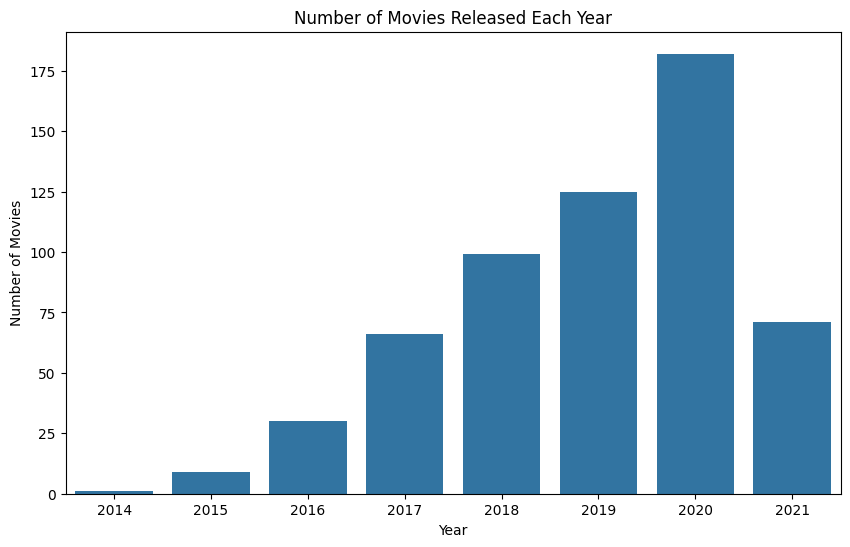

In [62]:
#1. How many movies are released each year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

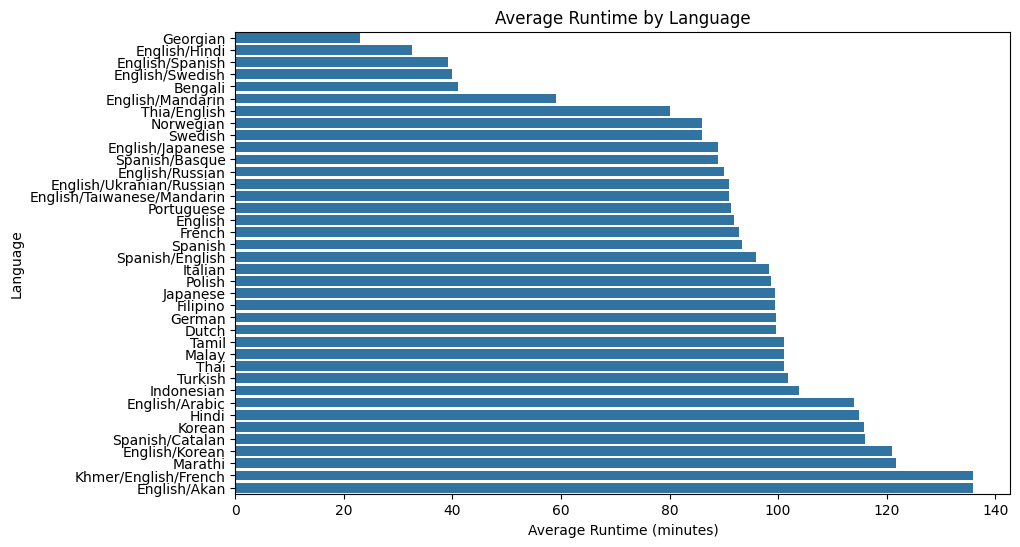

In [63]:
#2. What is the average runtime of movies by language?

plt.figure(figsize=(10, 6))
language_runtime = df.groupby('language')['runtime'].mean().sort_values()
sns.barplot(x=language_runtime.values, y=language_runtime.index)
plt.title('Average Runtime by Language')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Language')
plt.show()

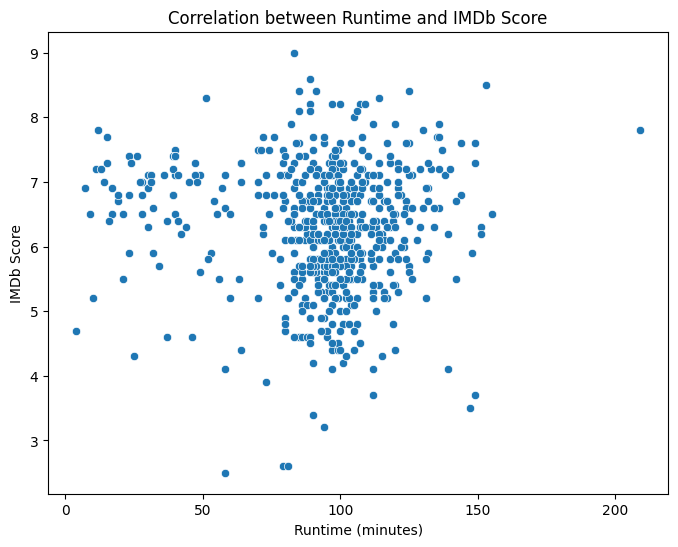

In [64]:
#3. Correlation between IMDb score and runtime?

plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=df)
plt.title('Correlation between Runtime and IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

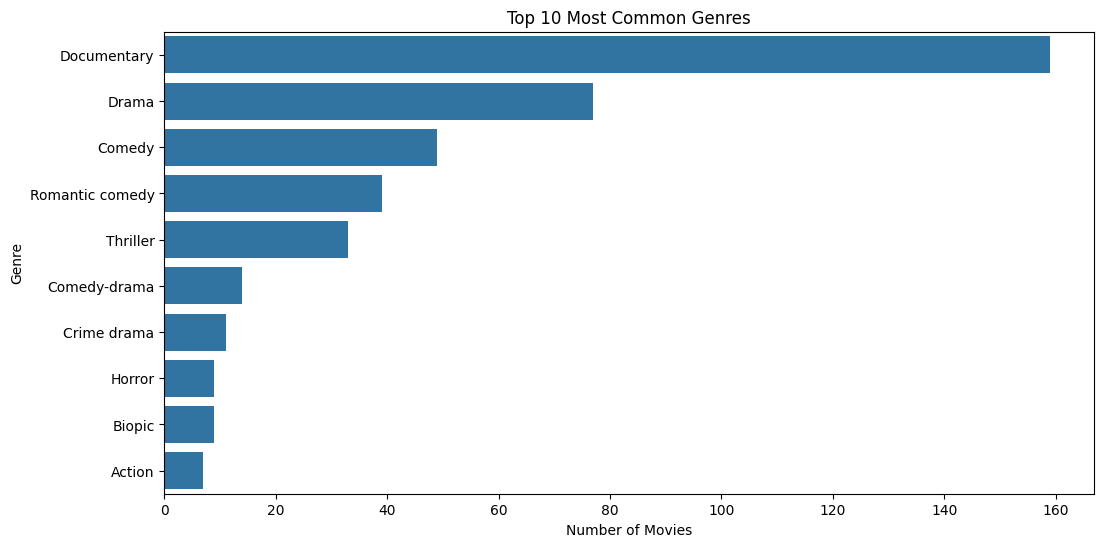

In [65]:
#4. What are the top 10 most common genres?

top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

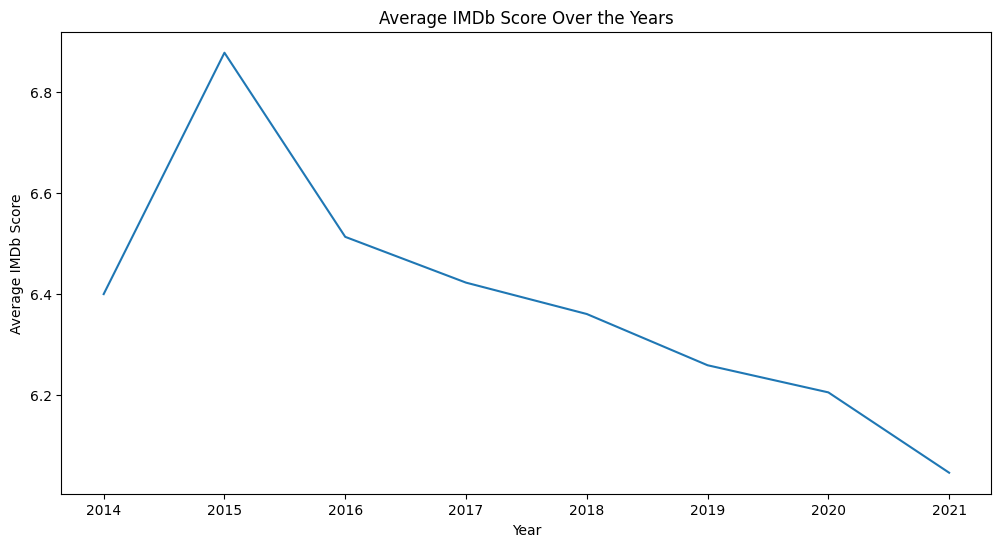

In [66]:
#5. How has the average IMDb score changed over the years?

plt.figure(figsize=(12, 6))
yearly_imdb = df.groupby('year')['imdb_score'].mean()
sns.lineplot(x=yearly_imdb.index, y=yearly_imdb.values)
plt.title('Average IMDb Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.show()
